In [1]:
#install setups

!pip install python-barcode[images]
!pip install qrcode
!apt install libzbar
!pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 888 kB/s 
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40402 sha256=962c124a993e67a1fa5ae49011395fc1c5a51684a6342abdcab91a0547bd2fec
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built qrcode
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libzbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Barcode Generation

#### Supported Barcode formats

- EAN-8
- EAN-13
- EAN-14
- UPC-A
- JAN
- ISBN-10
- ISBN-13
- ISSN
- Code 39
- Code 128
- PZN

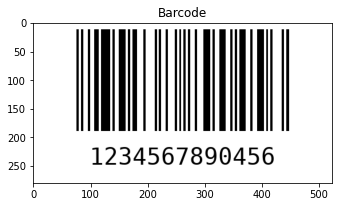

In [6]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open ('barcode.png', 'wb') as f:
  EAN13('123456789045', writer = ImageWriter()).write(f)

barcode = cv2.imread("barcode.png")
imshow("Barcode", barcode)

#### Qr Code

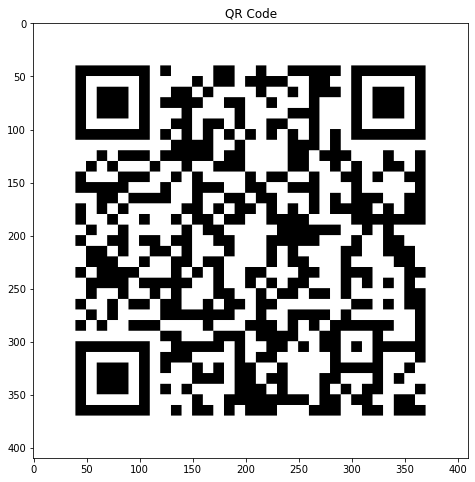

In [7]:
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data("https://wwww.enosjeba.com")
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")

qrcode = cv2.imread("qrcode.png")
imshow("QR Code", qrcode, size = 8)

**Configuartion for QR Codes**:

- version — Control the size of the QR Code. It accepts an integer from 1 to 40. Version 1 consists of 21 x 21 matrix.
- error_correction — Control the error correction used for the QR Code.
- box_size — Control the number of pixels of each boxes of the QR code.
- border — Control the boxes thickness of the border. The default is value is 4 which is also the minimum value according to the specification.

There are 4 constants available for error_correction. The higher errors can be corrected, the better it is.

- ERROR_CORRECT_L — About 7% or less errors can be corrected.
- ERROR_CORRECT_M — About 15% or less errors can be corrected. This is the default value.
- ERROR_CORRECT_Q — About 25% or less errors can be corrected.
- ERROR_CORRECT_H — About 30% or less errors can be corrected.

#### Decoding Qr

In [10]:
from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('qrcode.png')
result = decode(img)
for i in result:
    print(i.data.decode("utf-8"))

ImportError: ignored